# CAPSTONE PROJECT - THE BATTLE OF NEIGHBORHOODS

# What is the best place to open a Restaurant in Paris, France?


# 1. Introduction

I have been constantly striving to develop my technical skills to become a Data Science. So, I took the IBM course in order to gain knowledge and pursue the IBM Data Science Professional Certification: https://www.coursera.org/professional-certificates/ibm-data-science. 

During this course, I learned how to use Data Science tools, such as Jupyter Notebook, GitHub and IBM Watson Studio. The main programming language used was Python, which is packed with powerful libraries that can be utilised for Data Science such as Pandas, Numpy, Matplotlib, Seaborn, Folium, Scikit-learn and SciPy.

In the final assignment, called “Capstone Project”, it was required to use various tools and methodologies learned throughout this course to solve a real-life business problem. This business problem had to involve the use of location data derived from Foursquare (https://foursquare.com) using API.



# 2. Business Problem

Paris is the capital and most populous city of France, with an estimated population of 2,175,601 residents as of 2018, in an area of more than 105 square kilometres (41 square miles). Since the 17th century, Paris has been one of Europe's major centres of finance, diplomacy, commerce, fashion, gastronomy, science, and arts.

The city of Paris is divided into twenty arrondissements municipaux, administrative districts, more simply referred to as arrondissements. These are not to be confused with departmental arrondissements, which subdivide the larger French départements. The word "arrondissement", when applied to Paris, refers almost always to the municipal arrondissements presented in the figure below.

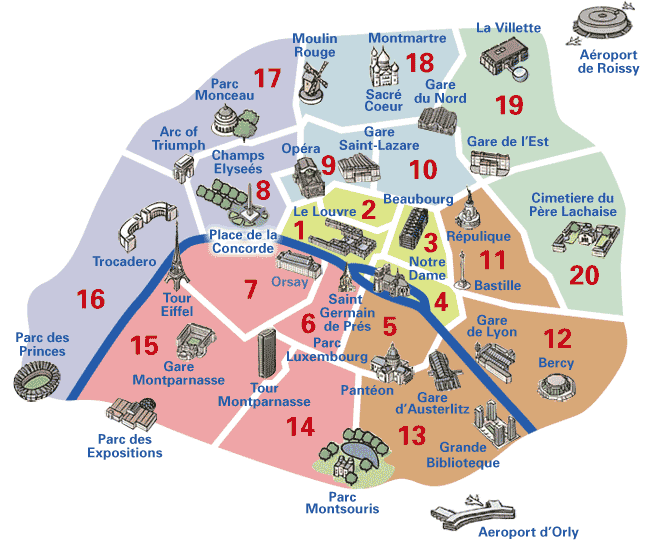


There are currently around 12,000 restaurants in Paris for 2,150 million inhabitants. That is to say, on average, about 1 restaurant per hectare. That's a lot, the competition is tough. Many restaurants are closing, especially with the coronavirus crisis. For who are think about opening a new restaurant, a market research that indicates the best commercial spot is very important and can be a big step towards business success.


# 3. Objective and interest

The aim of this project is to find the best neighborhood of Paris to open a new restaurant. For it, it will be showed the global vision of the distribution of restaurants in Paris.


## 3.1. Analytical Approach

The total number of neighborhoods in Paris are 20, so it is necessary to find a way to cluster them based on their similarities, that are the number and the kind of cuisines.

Briefly, after some steps of Data Cleaning and Data Exploration, it will be used a K-Means algorithm to extract the clusters, produce a map and make an argument on the final result.

## 3.2. Data Exploration

To explore the data, it will be used the “Folium” a python library that can create interactive leaflet map using coordinate data.

A new entrepreneur will be able to choose the new location for your business based on two important premises:

• to find where the restaurants are located and to know their specialty, for example using the Foursquare API, or then 

• to use machine learning to bring out the general culinary trends and tastes of each neighborhood, for example the unsupervised learning method Clustering • to visualize the position of the various restaurants in the choosen district, for example with a Folium.

# 4. Methodology

## 4.1. Importing libraries

In [63]:
# First step, let's import the python libraries

import pandas as pd #library to handle data in vectorized manner
import numpy as np #library to convert the data in tabular form and perform data analysis
from pandas import json_normalize 
import json #libraryto handle JSOn files
from sklearn.cluster import KMeans

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors


# Seaborn visualization library
import seaborn as sns

print('Libraries imported.')

Libraries imported.


In [64]:
# Import libraries for web scraping and to handle requests
!conda install -c conda-forge beautifulsoup4 --yes

from bs4 import BeautifulSoup #library for pulling data from HTML and XML files
import requests #library to handle requests

# Import library for convert an address into latitude and longitude values
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim

# Import library for map rendering
!conda install -c conda-forge folium=0.5.0 --yes 
import folium

! pip install yellowbrick

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.



## 4.2. Data Collection

The city of Paris is divided into twenty arrondissements municipaux, administrative districts, more simply referred to as arrondissements. These are not to be confused with departmental arrondissements, which subdivide the larger French départements. The word "arrondissement", when applied to Paris, refers almost always to the municipal arrondissements listed below.

The data was extracted from the following website and imported as an excel spreadsheet.

https://opendata.paris.fr/explore/dataset/quartier_paris/table/?disjunctive.c_ar

In [65]:
df_Paris=pd.read_excel('Documents\Pos-doutorado\Python\Coursera\Dados_Paris.xlsx', 'Plan1')
print('Dataframe shape:', df_Paris.shape)
df_Paris.head(6)

Dataframe shape: (20, 11)


,CAR,NAME,NSQAR,CAR.1,CARINSEE,LAR,NSQCO,SURFACE,PERIMETRE,Latitude,Longitude
0,3,Temple,750000003,3,3,3eme Ardt,750001537,1170882828,4519264,48.862872,2.360001
1,19,Buttes-Chaumont,750000019,19,19,19eme Ardt,750001537,6792651129,11253182,48.887076,2.384821
2,14,Observatoire,750000014,14,14,14eme Ardt,750001537,5614877309,10317483,48.829245,2.326542
3,10,Entrepot,750000010,10,10,10eme Ardt,750001537,2891739442,6739375,48.876130,2.360728
4,12,Reuilly,750000012,12,12,12eme Ardt,750001537,16314782637,24089666,48.834974,2.421325
5,16,Passy,750000016,16,16,16eme Ardt,750001537,16372542129,17416110,48.860392,2.261971


In [66]:
df_Paris.shape

(20, 11)

In [67]:
# Rename the necessary columns 'Name', 'Car' and 'LAR' to 'Neighborhood', 'Arrondissement_Num' and 'French'
df_Paris.rename(columns={'NAME': 'Neighborhood', 'CAR': 'Arrondissement_Num',  'LAR': 'French_Name'}, inplace=True)

# Remove unnecessary columns.
df_Paris.drop(['NSQAR','CAR.1','CARINSEE','NSQCO','SURFACE', 'PERIMETRE' ], axis=1, inplace=True)

print('Dataframe shape:', df_Paris.shape)
df_Paris.head()

Dataframe shape: (20, 5)


,Arrondissement_Num,Neighborhood,French_Name,Latitude,Longitude
0,3,Temple,3eme Ardt,48.862872,2.360001
1,19,Buttes-Chaumont,19eme Ardt,48.887076,2.384821
2,14,Observatoire,14eme Ardt,48.829245,2.326542
3,10,Entrepot,10eme Ardt,48.876130,2.360728
4,12,Reuilly,12eme Ardt,48.834974,2.421325


In [68]:
# Sort data by arrondissement number for the sake of a nice look.
df_Paris.sort_values(by=['Arrondissement_Num'], inplace=True) 
df_Paris.reset_index(drop=True, inplace = True)

print('Dataframe shape:', df_Paris.shape)
df_Paris.head(6)

Dataframe shape: (20, 5)


,Arrondissement_Num,Neighborhood,French_Name,Latitude,Longitude
0,1,Louvre,1er Ardt,48.862563,2.336443
1,2,Bourse,2eme Ardt,48.868279,2.342803
2,3,Temple,3eme Ardt,48.862872,2.360001
3,4,Hotel-de-Ville,4eme Ardt,48.854341,2.357630
4,5,Pantheon,5eme Ardt,48.844443,2.350715
5,6,Luxembourg,6eme Ardt,48.849130,2.332898


In [69]:
df_Paris

,Arrondissement_Num,Neighborhood,French_Name,Latitude,Longitude
0,1,Louvre,1er Ardt,48.862563,2.336443
1,2,Bourse,2eme Ardt,48.868279,2.342803
2,3,Temple,3eme Ardt,48.862872,2.360001
3,4,Hotel-de-Ville,4eme Ardt,48.854341,2.357630
4,5,Pantheon,5eme Ardt,48.844443,2.350715
5,6,Luxembourg,6eme Ardt,48.849130,2.332898
6,7,Palais-Bourbon,7eme Ardt,48.856174,2.312188
7,8,elysee,8eme Ardt,48.872721,2.312554
8,9,Opera,9eme Ardt,48.877164,2.337458
9,10,Entrepot,10eme Ardt,48.876130,2.360728


## 4.3 Getting Coordinates of Major Districts : Geopy Client

**Get the coordinates of these 20 major neighbohood of Paris using geocoder class of Geopy client as follow:**

In [70]:
# Retrieve the Latitude and Longitude for Paris
from geopy.geocoders import Nominatim 

address = 'Paris'

# User agent name is a drop of humor :D  
# Flânerie is the act of strolling, with all of its accompanying associations.
# The ability to wander detached from society with no other purpose than to be an acute observer of society.

geolocator = Nominatim(user_agent="Paris_explorer")

location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print(f'The geographical coordinates of Paris (France) are {latitude} and {longitude}.')

The geographical coordinates of Paris (France) are 48.8566969 and 2.3514616.


**Use python folium library to visualize geographic details of Paris and its neighbohood and create a map with boroughs superimposed on top. It was used latitude and longitude values to get the visual as below:**

In [95]:
map_paris = folium.Map(location=[latitude, longitude], tiles='cartodbpositron', zoom_start=13)

# add circle shaped markers of districts
for lat, lng, label in zip(df_Paris['Latitude'], df_Paris['Longitude'], df_Paris['French_Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_paris)  
    
map_paris

## 4.4. Exploratory Data Analysis:

**Use the Foursquare API to explore the Arrondissements of Paris (Neighborhoods)** 

Define Foursquare Credentials and Version

In [74]:
CLIENT_ID = '4RXRYTQPQVF0LDHKKBYNQOYIYTW414B03I2IJCMCRXR2QLQC' # your Foursquare ID
CLIENT_SECRET = '5MOFV0LBDKO5CZV3FHL2UUTAQQQ3AAPBZAPIHWOHFHVHBJTZ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 30

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: 4RXRYTQPQVF0LDHKKBYNQOYIYTW414B03I2IJCMCRXR2QLQC
CLIENT_SECRET:5MOFV0LBDKO5CZV3FHL2UUTAQQQ3AAPBZAPIHWOHFHVHBJTZ


Let's explore the first neighborhood in our dataframe.

In [75]:
# Explore the first Neighborhood in our dataframe.
df_Paris.loc[0, 'Neighborhood']

'Louvre'

In [76]:
# Get the Neighborhood's latitude and Longitude values.

neighborhood_latitude = df_Paris.loc[0, 'Latitude'] # Neighborhood latitude value
neighborhood_longitude = df_Paris.loc[0, 'Longitude'] # Neighborhood longitude value

neighborhood_name = df_Paris.loc[0, 'Neighborhood'] # Neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Louvre are 48.8625627, 2.336443362.


## 4.5. Using Foursquare Location Data

**Finally, let’s make use of Foursquare API and get the top 100 venues that are in Louvre within a radius of 500 meters.**

In [77]:
limit = 100 # limit of number of venues returned by Foursquare API.
radius = 500 # Define radius. 500 is default number but good for start. 

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, CLIENT_SECRET, VERSION, neighborhood_latitude, neighborhood_longitude, radius, limit)

# Lets check whole URL
url

'https://api.foursquare.com/v2/venues/explore?&client_id=4RXRYTQPQVF0LDHKKBYNQOYIYTW414B03I2IJCMCRXR2QLQC&client_secret=5MOFV0LBDKO5CZV3FHL2UUTAQQQ3AAPBZAPIHWOHFHVHBJTZ&v=20180605&ll=48.8625627,2.336443362&radius=500&limit=100'

In [14]:
# Send the GET request and examine the resutls
results = requests.get(url).json()

# We got a very big dictionary as result. After exploratory first look we can make some clarification for cleaner view.
results['response']['groups']

[{'type': 'Recommended Places',
  'name': 'recommended',
  'items': [{'reasons': {'count': 0,
     'items': [{'summary': 'This spot is popular',
       'type': 'general',
       'reasonName': 'globalInteractionReason'}]},
    'venue': {'id': '4adcda10f964a520af3521e3',
     'name': 'Musée du Louvre',
     'location': {'address': 'Rue de Rivoli',
      'crossStreet': 'Place du Carrousel',
      'lat': 48.86084691113991,
      'lng': 2.336440086364746,
      'labeledLatLngs': [{'label': 'display',
        'lat': 48.86084691113991,
        'lng': 2.336440086364746}],
      'distance': 190,
      'postalCode': '75001',
      'cc': 'FR',
      'neighborhood': 'Le Louvre',
      'city': 'Paris',
      'state': 'Île-de-France',
      'country': 'France',
      'formattedAddress': ['Rue de Rivoli (Place du Carrousel)',
       '75001 Paris',
       'France']},
     'categories': [{'id': '4bf58dd8d48988d18f941735',
       'name': 'Art Museum',
       'pluralName': 'Art Museums',
       'shortNam

### Exploration of each venues in Paris

**Select necessary part of results, flatten and filtering**

In [78]:
# select necessary part of results and flatten
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues) 

# filter only necessary columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]

**Define the function that extracts the category of the venues**

In [79]:
# define a function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

**Structure the json file into a pandas dataframe**

In [80]:
# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

In [83]:
print('Nearby_venues Dataframe shape:', nearby_venues.shape)
nearby_venues.head(100)

Nearby_venues Dataframe shape: (100, 4)


,name,categories,lat,lng
0,Musée du Louvre,Art Museum,48.860847,2.336440
1,Palais Royal,Historic Site,48.863236,2.337127
2,Comédie-Française,Theater,48.863088,2.336612
3,Cour Napoléon,Plaza,48.861172,2.335088
4,La Clef Louvre Paris,Hotel,48.863977,2.336140
...,...,...,...,...
95,Institut National d'Histoire de l'Art (INHA),General College & University,48.866680,2.338986
96,Echizensoba Togo,Soba Restaurant,48.866230,2.332742
97,Urban Outfitters,Clothing Store,48.860652,2.342110
98,TeaYammi,Tea Room,48.866760,2.335194


**One request summary**

In [84]:
# Let's see how many venues were found in 1eme Ardt within a radius of 500 meters.
print('{} venues were found and fetched from Foursquare.'.format(nearby_venues.shape[0]))

100 venues were found and fetched from Foursquare.


In [85]:
print ('{} unique categories in Paris'.format(nearby_venues['categories'].value_counts().shape[0]))

48 unique categories in Paris


## Scale the algorithm to apply it to all neighborhoods

Scale the algorithm to apply it to all neighborhoods

In [86]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(name, lat, lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['French_Name', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [87]:
# Create a new dataframe and fill it
paris_venues = getNearbyVenues(names=df_Paris['French_Name'],
                                   latitudes=df_Paris['Latitude'],
                                   longitudes=df_Paris['Longitude'])

1er Ardt
2eme Ardt
3eme Ardt
4eme Ardt
5eme Ardt
6eme Ardt
7eme Ardt
8eme Ardt
9eme Ardt
10eme Ardt
11eme Ardt
12eme Ardt
13eme Ardt
14eme Ardt
15eme Ardt
16eme Ardt
17eme Ardt
18eme Ardt
19eme Ardt
20eme Ardt


In [142]:
print('Dataframe shape:',paris_venues.shape)
paris_venues

Dataframe shape: (549, 7)


,French_Name,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,1er Ardt,48.862563,2.336443,Musée du Louvre,48.860847,2.336440,Art Museum
1,1er Ardt,48.862563,2.336443,Palais Royal,48.863236,2.337127,Historic Site
2,1er Ardt,48.862563,2.336443,Comédie-Française,48.863088,2.336612,Theater
3,1er Ardt,48.862563,2.336443,Cour Napoléon,48.861172,2.335088,Plaza
4,1er Ardt,48.862563,2.336443,La Clef Louvre Paris,48.863977,2.336140,Hotel
...,...,...,...,...,...,...,...
544,20eme Ardt,48.863461,2.401188,Place Édith Piaf,48.866391,2.405491,Plaza
545,20eme Ardt,48.863461,2.401188,Indiana Café – Gambetta,48.864661,2.398670,Latin American Restaurant
546,20eme Ardt,48.863461,2.401188,La Tordue,48.863884,2.399269,Bakery
547,20eme Ardt,48.863461,2.401188,Le Ramus,48.863675,2.397556,Bar


**Calculate how many unique venue categories there are in dataset for all neighborhoods.**

In [89]:
print('There are {} unique venue categories.'.format(len(paris_venues['Venue Category'].unique())))

There are 143 unique venue categories.


## Restaurants

**Let's evaluate how many different restaurants represented among top restaurants**

In [90]:
# Create a selected Dataframe to Concentrate Only on Restaurants 
paris_resto = paris_venues[paris_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
paris_resto.index = np.arange(1, len(paris_resto)+1)

In [27]:
print (paris_resto['Venue Category'].value_counts())

French Restaurant                76
Italian Restaurant               21
Vietnamese Restaurant            12
Japanese Restaurant              12
Restaurant                       12
Thai Restaurant                   6
Asian Restaurant                  6
Mediterranean Restaurant          5
Seafood Restaurant                5
Chinese Restaurant                5
Lebanese Restaurant               5
Indian Restaurant                 3
Vegetarian / Vegan Restaurant     3
Korean Restaurant                 3
Scandinavian Restaurant           2
Sushi Restaurant                  2
Portuguese Restaurant             2
African Restaurant                2
Latin American Restaurant         2
Peruvian Restaurant               2
Gluten-free Restaurant            2
Moroccan Restaurant               2
Greek Restaurant                  1
Persian Restaurant                1
Comfort Food Restaurant           1
Ramen Restaurant                  1
Turkish Restaurant                1
Tapas Restaurant            

In [28]:
print('There are {} uniques restaurants.'.format(len(paris_resto['Venue Category'].unique())))

There are 44 uniques restaurants.


In [29]:
# create a dataframe of top 10 restaurant categories

paris_resto_top10 = paris_resto['Venue Category'].value_counts ()[0:10].to_frame(name='frequency')
paris_resto_top10.reset_index(inplace = True)

paris_resto_top10.iat[4, 0]='General Restaurant'
paris_resto_top10.rename(index=str, columns={"index": "Venue Category", "frequency": "Frequency"}, inplace=True)

paris_resto_top10

,Venue Category,Frequency
0,French Restaurant,76
1,Italian Restaurant,21
2,Vietnamese Restaurant,12
3,Japanese Restaurant,12
4,General Restaurant,12
5,Thai Restaurant,6
6,Asian Restaurant,6
7,Mediterranean Restaurant,5
8,Seafood Restaurant,5
9,Chinese Restaurant,5


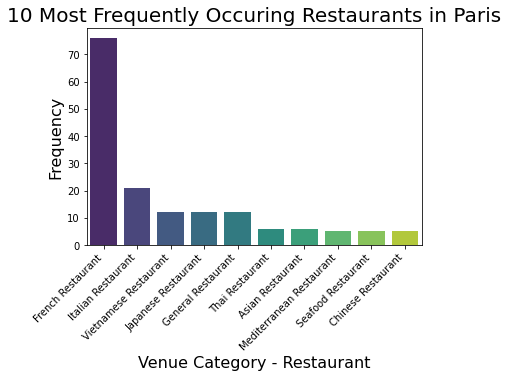

<Figure size 1296x720 with 0 Axes>

In [30]:
# Draw graph 
s=sns.barplot(x="Venue Category", y="Frequency", palette= "viridis", data=paris_resto_top10)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('10 Most Frequently Occuring Restaurants in Paris', fontsize=20)
plt.xlabel("Venue Category - Restaurant", fontsize=16)
plt.ylabel ("Frequency", fontsize=16)
plt.savefig("Most_Freq_Restaurant.png", dpi=300)
fig = plt.figure(figsize=(18,10))
plt.show()

In [31]:
paris_resto

,French_Name,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,1er Ardt,48.862563,2.336443,LouLou,48.862804,2.333500,Italian Restaurant
2,1er Ardt,48.862563,2.336443,Kodawari Ramen (Tsukiji),48.864383,2.336297,Ramen Restaurant
3,2eme Ardt,48.868279,2.342803,Chez Georges,48.866373,2.341311,French Restaurant
4,2eme Ardt,48.868279,2.342803,Liza,48.867709,2.340923,Lebanese Restaurant
5,2eme Ardt,48.868279,2.342803,Daroco,48.867130,2.339243,Italian Restaurant
...,...,...,...,...,...,...,...
208,20eme Ardt,48.863461,2.401188,Charlotte,48.864884,2.399308,French Restaurant
209,20eme Ardt,48.863461,2.401188,Le Papillon,48.861676,2.405698,French Restaurant
210,20eme Ardt,48.863461,2.401188,Futake,48.865083,2.397281,Japanese Restaurant
211,20eme Ardt,48.863461,2.401188,Indiana Café – Gambetta,48.864661,2.398670,Latin American Restaurant


In [93]:
paris_resto_count = paris_resto.groupby(['French_Name'])['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())
paris_resto_count=paris_resto_count.to_frame().reset_index()
paris_resto_count.rename(index=str, columns={"Venue Category": "Restaurants"}, inplace=True)
paris_resto_count.head(10)

,French_Name,Restaurants
0,10eme Ardt,10
1,11eme Ardt,14
2,13eme Ardt,23
3,14eme Ardt,16
4,15eme Ardt,17
5,16eme Ardt,1
6,17eme Ardt,15
7,18eme Ardt,14
8,19eme Ardt,10
9,1er Ardt,2


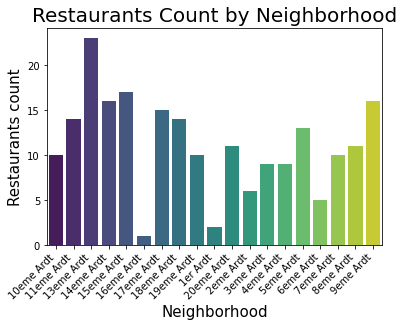

<Figure size 1584x720 with 0 Axes>

In [33]:
# Draw graph 
s=sns.barplot(x="French_Name", y="Restaurants", palette= 'viridis', data=paris_resto_count)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Restaurants Count by Neighborhood', fontsize=20)
plt.xlabel("Neighborhood", fontsize=15)
plt.ylabel ("Restaurants count", fontsize=15)
plt.savefig("Restaurants_count.png", dpi=300)
fig = plt.figure(figsize=(22,10))
plt.show();

# Café, Bar and Creperies

**Let's examine how many other different venues related to food and drink represented among all selected venues**

In [34]:
# Set Category List. Drink & Beverages
drink_cat=['Coffee','Shop Bar','Wine Bar','Juice Bar','Beer Bar','Tea Room','Brasserie']
ffood_cat=['Café','Bistro','Pastry Shop','Bakery','Creperie','Salad Place','Pizza Place','Sandwich Place','Ice Cream Shop']

In [35]:
# Create a selected Dataframe with Drink Category 
paris_drink = paris_venues[paris_venues['Venue Category'].str.contains('|'.join(drink_cat))].reset_index(drop=True)
paris_drink.index = np.arange(1, len(paris_drink)+1)
print (paris_drink['Venue Category'].value_counts())

Coffee Shop    13
Wine Bar        9
Beer Bar        5
Tea Room        4
Brasserie       3
Juice Bar       1
Name: Venue Category, dtype: int64


In [36]:
paris_drink_top10 = paris_drink['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
paris_drink_top10.reset_index(inplace = True)
paris_drink_top10.rename(index=str, columns={"index": "Venue Category", "frequency": "Frequency"}, inplace=True)
paris_drink_top10

,Venue Category,Frequency
0,Coffee Shop,13
1,Wine Bar,9
2,Beer Bar,5
3,Tea Room,4
4,Brasserie,3
5,Juice Bar,1


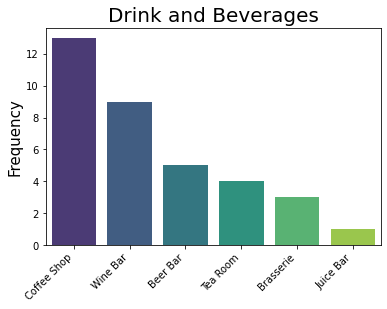

<Figure size 1584x720 with 0 Axes>

In [37]:
# Draw graph

s=sns.barplot(x="Venue Category", y="Frequency",  palette= 'viridis', data=paris_drink_top10)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('Drink and Beverages', fontsize=20)
plt.xlabel("", fontsize=25)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Top_Drinks.png", dpi=300)
fig = plt.figure(figsize=(22,10))
plt.show()

In [38]:
# Create a selected Dataframe with Café and Bistro Category 
paris_ffood = paris_venues[paris_venues['Venue Category'].str.contains('|'.join(ffood_cat))].reset_index(drop=True)
paris_ffood.index = np.arange(1, len(paris_ffood)+1)
print (paris_ffood['Venue Category'].value_counts())

Bakery            20
Café              15
Bistro            14
Pizza Place        9
Creperie           7
Ice Cream Shop     7
Sandwich Place     6
Pastry Shop        5
Salad Place        2
Name: Venue Category, dtype: int64


In [39]:
paris_ffood_top10 = paris_ffood['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
paris_ffood_top10.reset_index(inplace = True)
paris_ffood_top10.rename(index=str, columns={"index": "Venue Category", "frequency": "Frequency"}, inplace=True)
paris_ffood_top10

,Venue Category,Frequency
0,Bakery,20
1,Café,15
2,Bistro,14
3,Pizza Place,9
4,Creperie,7
5,Ice Cream Shop,7
6,Sandwich Place,6
7,Pastry Shop,5
8,Salad Place,2


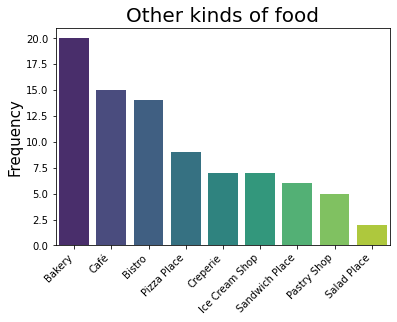

<Figure size 1584x1080 with 0 Axes>

In [40]:
# Draw graph 
s=sns.barplot(x="Venue Category", y="Frequency", palette= 'viridis', data=paris_ffood_top10)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('Other kinds of food', fontsize=20)
plt.xlabel("", fontsize=20)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Top_Bistro_Cafe.png", dpi=300)
fig = plt.figure(figsize=(22,15))
plt.show()

## 4.6. Normalize aggregated data and analyze each of the Neighborhoods

**Make one hot encoding with 'Venue Category'**

In [41]:
# one hot encoding
paris_norm = pd.get_dummies(paris_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
paris_norm['Neighborhood'] = paris_venues['French_Name'] 

# move neighborhood column to the first column
fixed_columns = [paris_norm.columns[-1]] + list(paris_norm.columns[:-1])
paris_norm = paris_norm[fixed_columns]

In [144]:
# Check dataframe 
print('Dataframe shape:',paris_norm.shape)
paris_norm.head(6)

Dataframe shape: (549, 144)


,Neighborhood,Afghan Restaurant,African Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Bakery,Bar,Basque Restaurant,...,Trail,Turkish Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Zoo,Zoo Exhibit
0,1er Ardt,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1er Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1er Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1er Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1er Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1er Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Group rows by neighborhood and take the mean of the frequency of occurrence of each category**

In [147]:
paris_grouped = paris_norm.groupby('Neighborhood').mean().reset_index() # reset_index() redefine o índice do quadro de dados fornecido. 
paris_grouped.head()

,Neighborhood,Afghan Restaurant,African Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Bakery,Bar,Basque Restaurant,...,Trail,Turkish Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Zoo,Zoo Exhibit
0,10eme Ardt,0.000000,0.066667,0.0,0.000000,0.0,0.000000,0.033333,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00,0.00
1,11eme Ardt,0.033333,0.000000,0.0,0.033333,0.0,0.033333,0.033333,0.033333,0.0,...,0.000000,0.0,0.033333,0.0,0.000000,0.033333,0.0,0.0,0.00,0.00
2,12eme Ardt,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.25,0.25
3,13eme Ardt,0.000000,0.000000,0.0,0.000000,0.0,0.166667,0.033333,0.000000,0.0,...,0.033333,0.0,0.000000,0.0,0.233333,0.000000,0.0,0.0,0.00,0.00
4,14eme Ardt,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.040000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00,0.00


**Group rows by neighborhood and sum of occurrence of each venue category**

In [44]:
# This data set would be usefull later on
paris_grouped_sum = paris_norm.groupby('Neighborhood').sum().reset_index()

# Check dataframe 
print('Dataframe shape:', paris_grouped_sum.shape)
paris_grouped_sum.head(6)

Dataframe shape: (20, 144)


,Neighborhood,Afghan Restaurant,African Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Bakery,Bar,Basque Restaurant,...,Trail,Turkish Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Zoo,Zoo Exhibit
0,10eme Ardt,0,2,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,11eme Ardt,1,0,0,1,0,1,1,1,0,...,0,0,1,0,0,1,0,0,0,0
2,12eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,13eme Ardt,0,0,0,0,0,5,1,0,0,...,1,0,0,0,7,0,0,0,0,0
4,14eme Ardt,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,15eme Ardt,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


**Look the neighborhoods - each one with it's top 10 most common venues**

In [45]:
top_common_venues = 10
for neigh in paris_grouped['Neighborhood'].sort_values():
    print("----- {} -------------".format(neigh,))
    temp = paris_grouped[paris_grouped['Neighborhood'] == neigh].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(top_common_venues))
    print('\n')

----- 10eme Ardt -------------
                      venue  freq
0               Coffee Shop  0.13
1         French Restaurant  0.10
2                    Bistro  0.07
3  Mediterranean Restaurant  0.07
4                      Café  0.07
5        African Restaurant  0.07
6                 Bookstore  0.03
7                    Garden  0.03
8              Burger Joint  0.03
9         Shanxi Restaurant  0.03


----- 11eme Ardt -------------
                  venue  freq
0                  Café  0.10
1            Restaurant  0.07
2    Italian Restaurant  0.07
3           Pastry Shop  0.07
4   Moroccan Restaurant  0.03
5  Ethiopian Restaurant  0.03
6        Sandwich Place  0.03
7                 Plaza  0.03
8     French Restaurant  0.03
9             Gastropub  0.03


----- 12eme Ardt -------------
                    venue  freq
0             Zoo Exhibit  0.25
1                     Zoo  0.25
2     Monument / Landmark  0.25
3             Supermarket  0.25
4            Perfume Shop  0.00
5  Okon

**The top 10 venue categories for each neighborhood**

**Shrink the data. Make new dataframe only from top common venues.**

In [46]:
# Creating a function to extract top common venues.
def return_most_common_venues(row, top_common_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:top_common_venues]

In [96]:
# Create the new dataframe. Arrondissements france name  and display the top 10 venues for each neighborhood
top_common_venues = 10
suffix = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(top_common_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, siffix[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
# create a new dataframe
paris_top_venues = pd.DataFrame(columns=columns)
paris_top_venues['Neighborhood'] = paris_grouped['Neighborhood']

for ind in np.arange(paris_grouped.shape[0]):
    paris_top_venues.iloc[ind, 1:] = return_most_common_venues(paris_grouped.iloc[ind, :], top_common_venues)

# final look of sorted data is
paris_top_venues

,Neighborhood,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,10eme Ardt,Coffee Shop,French Restaurant,Bistro,Mediterranean Restaurant,Café,African Restaurant,Bookstore,Garden,Burger Joint,Shanxi Restaurant
1,11eme Ardt,Café,Restaurant,Italian Restaurant,Pastry Shop,Moroccan Restaurant,Ethiopian Restaurant,Sandwich Place,Plaza,French Restaurant,Gastropub
2,12eme Ardt,Zoo Exhibit,Zoo,Monument / Landmark,Supermarket,Perfume Shop,Okonomiyaki Restaurant,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue
3,13eme Ardt,Vietnamese Restaurant,Asian Restaurant,French Restaurant,Thai Restaurant,Chinese Restaurant,Juice Bar,Creperie,Park,Cambodian Restaurant,Convenience Store
4,14eme Ardt,French Restaurant,Hotel,Bistro,Food & Drink Shop,Italian Restaurant,Sushi Restaurant,Bakery,Pizza Place,Tea Room,Fast Food Restaurant
5,15eme Ardt,Italian Restaurant,Lebanese Restaurant,French Restaurant,Thai Restaurant,Indian Restaurant,Hotel,Russian Restaurant,Restaurant,Plaza,Persian Restaurant
6,16eme Ardt,Lake,Plaza,Bus Station,Art Museum,French Restaurant,Pool,Park,Boat or Ferry,Persian Restaurant,Pastry Shop
7,17eme Ardt,Hotel,French Restaurant,Italian Restaurant,Bakery,Restaurant,Turkish Restaurant,Burger Joint,Concert Hall,Pizza Place,Plaza
8,18eme Ardt,French Restaurant,Bar,Restaurant,Middle Eastern Restaurant,Deli / Bodega,Pizza Place,Seafood Restaurant,Gastropub,Health Food Store,Cheese Shop
9,19eme Ardt,French Restaurant,Bar,Seafood Restaurant,Bistro,Beer Bar,Coffee Shop,Burger Joint,Café,Supermarket,Steakhouse


This is a very useful results table that can provide at a glance information for all of the districts. Even once any conclusions are drawn further into the data workflow, we can refer back to this table for meaningful insights about the top categories of businesses in all the neighborhoods. Even without actual counts and numbers, it makes a great reference table.

As we can see, some districts have characteristic features. Some are dominated by classic restaurants, others, such as 15, are dominated by non-French restaurants (Italian, Indian and Thai cuisines). The characteristics we obtained as a result of a clear analysis emphasize and confirm the obvious characteristics of the central areas in which there are many points of interest and in which institutions focus mainly on tourists and the tourism industry.

## 4.7. Cluster Neighborhoods

To analyze which neighborhood of Paris is good to open a new restaurant, we can use a K-means clustering: a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity.

So the first step is identify the best “K” using a famous analytical approach: the elbow method.

Let's see:

C:\Users\buenes\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:155: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\buenes\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


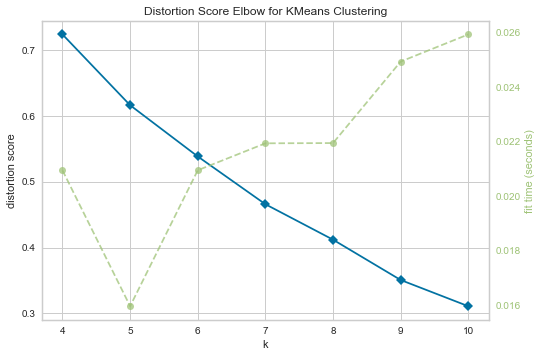

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [131]:
from yellowbrick.cluster import KElbowVisualizer
paris_clustering = paris_grouped.drop('Neighborhood', 1)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,11))

visualizer.fit(paris_clustering)        # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data


No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc. I settled on the option with 5 clusters.


**Run k-means to cluster the neighborhood into 6 clusters**

In [178]:
clust_num = 5
paris_grouped_clust = paris_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=clust_num, random_state=0).fit(paris_grouped_clust)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 2, 0, 3, 1, 2, 4, 2, 2, 2])

**Let's create a new dataframe that includes the cluster as well as the top 10 venues for each arrondissement.**

In [179]:
# reserved
paris_top_venues_labeled = paris_top_venues

In [180]:
# add clustering labels
#paris_top_venues_labeled.insert(0, 'Cluster', kmeans.labels_)
paris_top_venues_labeled.rename(columns={'Neighborhood':'French_Name'}, inplace=True)

paris_merged = df_Paris

# merge paris_top_venues_labeled with paris_arr initial data to add latitude/longitude for each neighborhood
paris_merged = paris_merged.join(paris_top_venues_labeled.set_index('French_Name'), on='French_Name')

In [181]:
print('Dataframe shape:', paris_merged.shape)
paris_merged.head(20)

Dataframe shape: (20, 16)


,Arrondissement_Num,Neighborhood,French_Name,Latitude,Longitude,Cluster,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Louvre,1er Ardt,48.862563,2.336443,2,Plaza,Café,Coffee Shop,Art Museum,Historic Site,Exhibit,Hotel,Pedestrian Plaza,Garden,Smoke Shop
1,2,Bourse,2eme Ardt,48.868279,2.342803,2,Cocktail Bar,Coffee Shop,Hotel,Pizza Place,Perfume Shop,Donut Shop,Plaza,French Restaurant,Peruvian Restaurant,Salad Place
2,3,Temple,3eme Ardt,48.862872,2.360001,2,Hotel,Sandwich Place,Dessert Shop,Wine Bar,Burger Joint,Farmers Market,French Restaurant,Seafood Restaurant,Creperie,Gluten-free Restaurant
3,4,Hotel-de-Ville,4eme Ardt,48.854341,2.357630,2,Ice Cream Shop,French Restaurant,Coffee Shop,Wine Bar,Italian Restaurant,Hotel,Chocolate Shop,Garden,Restaurant,Café
4,5,Pantheon,5eme Ardt,48.844443,2.350715,1,French Restaurant,Plaza,Creperie,Bar,Hookah Bar,Hotel,Peruvian Restaurant,Ice Cream Shop,Breakfast Spot,Sushi Restaurant
5,6,Luxembourg,6eme Ardt,48.849130,2.332898,2,Pastry Shop,Bakery,French Restaurant,Fountain,Dessert Shop,Tennis Court,Cocktail Bar,Clothing Store,Chocolate Shop,Pharmacy
6,7,Palais-Bourbon,7eme Ardt,48.856174,2.312188,1,French Restaurant,Hotel,Plaza,History Museum,Garden,Cocktail Bar,Historic Site,Park,Coffee Shop,Food & Drink Shop
7,8,elysee,8eme Ardt,48.872721,2.312554,1,French Restaurant,Hotel,Art Gallery,Bakery,Spa,Hotel Bar,Sporting Goods Shop,Cycle Studio,Resort,Corsican Restaurant
8,9,Opera,9eme Ardt,48.877164,2.337458,1,French Restaurant,Bakery,Latin American Restaurant,Brazilian Restaurant,Plaza,Restaurant,Pizza Place,Seafood Restaurant,Gourmet Shop,Gym / Fitness Center
9,10,Entrepot,10eme Ardt,48.876130,2.360728,2,Coffee Shop,French Restaurant,Bistro,Mediterranean Restaurant,Café,African Restaurant,Bookstore,Garden,Burger Joint,Shanxi Restaurant


**Finally, let's visualize the resulting clusters**

In [172]:
list_resto_count=paris_resto_count['Restaurants'].to_list()
list_neigh=paris_resto_count['French_Name'].to_list()

In [173]:
list_resto_count.append(2)
list_neigh.append('12eme Ardt')

In [174]:
# create map
map_resto = folium.Map(location=[latitude,longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(clust_num)
ys = [i + x + (i*x)**2 for i in range(clust_num)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
for lat, lon, poi, cluster in zip(paris_merged['Latitude'], 
                                  paris_merged['Longitude'], 
                                  paris_merged['French_Name'], 
                                  paris_merged['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=list_resto_count[list_neigh.index(poi)]*3,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_resto)
       
map_resto

**Examine the Clusters**

K-means cluster our data into 5 clusters and return those items

**Cluster 0.**

In [175]:
paris_merged.loc[paris_merged['Cluster'] == 0, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Neighborhood,Cluster,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Reuilly,0,Zoo Exhibit,Zoo,Monument / Landmark,Supermarket,Perfume Shop,Okonomiyaki Restaurant,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue


**Cluster 1**

In [176]:

paris_merged.loc[paris_merged['Cluster'] == 1, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Neighborhood,Cluster,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Pantheon,1,French Restaurant,Plaza,Creperie,Bar,Hookah Bar,Hotel,Peruvian Restaurant,Ice Cream Shop,Breakfast Spot,Sushi Restaurant
6,Palais-Bourbon,1,French Restaurant,Hotel,Plaza,History Museum,Garden,Cocktail Bar,Historic Site,Park,Coffee Shop,Food & Drink Shop
7,elysee,1,French Restaurant,Hotel,Art Gallery,Bakery,Spa,Hotel Bar,Sporting Goods Shop,Cycle Studio,Resort,Corsican Restaurant
8,Opera,1,French Restaurant,Bakery,Latin American Restaurant,Brazilian Restaurant,Plaza,Restaurant,Pizza Place,Seafood Restaurant,Gourmet Shop,Gym / Fitness Center
13,Observatoire,1,French Restaurant,Hotel,Bistro,Food & Drink Shop,Italian Restaurant,Sushi Restaurant,Bakery,Pizza Place,Tea Room,Fast Food Restaurant


**Cluster 2**

In [177]:

paris_merged.loc[paris_merged['Cluster'] == 2, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Neighborhood,Cluster,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Louvre,2,Plaza,Café,Coffee Shop,Art Museum,Historic Site,Exhibit,Hotel,Pedestrian Plaza,Garden,Smoke Shop
1,Bourse,2,Cocktail Bar,Coffee Shop,Hotel,Pizza Place,Perfume Shop,Donut Shop,Plaza,French Restaurant,Peruvian Restaurant,Salad Place
2,Temple,2,Hotel,Sandwich Place,Dessert Shop,Wine Bar,Burger Joint,Farmers Market,French Restaurant,Seafood Restaurant,Creperie,Gluten-free Restaurant
3,Hotel-de-Ville,2,Ice Cream Shop,French Restaurant,Coffee Shop,Wine Bar,Italian Restaurant,Hotel,Chocolate Shop,Garden,Restaurant,Café
5,Luxembourg,2,Pastry Shop,Bakery,French Restaurant,Fountain,Dessert Shop,Tennis Court,Cocktail Bar,Clothing Store,Chocolate Shop,Pharmacy
9,Entrepot,2,Coffee Shop,French Restaurant,Bistro,Mediterranean Restaurant,Café,African Restaurant,Bookstore,Garden,Burger Joint,Shanxi Restaurant
10,Popincourt,2,Café,Restaurant,Italian Restaurant,Pastry Shop,Moroccan Restaurant,Ethiopian Restaurant,Sandwich Place,Plaza,French Restaurant,Gastropub
14,Vaugirard,2,Italian Restaurant,Lebanese Restaurant,French Restaurant,Thai Restaurant,Indian Restaurant,Hotel,Russian Restaurant,Restaurant,Plaza,Persian Restaurant
16,Batignolles-Monceau,2,Hotel,French Restaurant,Italian Restaurant,Bakery,Restaurant,Turkish Restaurant,Burger Joint,Concert Hall,Pizza Place,Plaza
17,Buttes-Montmartre,2,French Restaurant,Bar,Restaurant,Middle Eastern Restaurant,Deli / Bodega,Pizza Place,Seafood Restaurant,Gastropub,Health Food Store,Cheese Shop


**Cluster 3**

In [167]:
paris_merged.loc[paris_merged['Cluster'] == 3, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Neighborhood,Cluster,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Gobelins,3,Vietnamese Restaurant,Asian Restaurant,French Restaurant,Thai Restaurant,Chinese Restaurant,Juice Bar,Creperie,Park,Cambodian Restaurant,Convenience Store


**Cluster 4**

In [168]:
paris_merged.loc[paris_merged['Cluster'] == 4, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Neighborhood,Cluster,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,Passy,4,Lake,Plaza,Bus Station,Art Museum,French Restaurant,Pool,Park,Boat or Ferry,Persian Restaurant,Pastry Shop


# 5. Results & Discussion

This data analysis shows us that each neighborhood has its particularity. Some are dominated by French Restaurant such as, Pantheon, Buttes-Montmartre and  Opera, others, as Vaugirard, are dominated by Italian Cuisine.

The region called "Cluster 2" has French restaurants as 1th most commum venue and it is surrounded by good infrastructure including squares, parks, hotels, etc. The characteristics these regions confirm that they are tourist spots and can be interesting for opening restaurants.

The choice of location will depend on the type of restaurant or other kind of food and beverage that the entrepreneur wishes to open. The tables presented important data for decision making. The interested can analyze the frequency of establishments by neighoborhood, as well as all the tourist and commercial attractions in the surroundings. Thus, it is up to the executive to define whether he prefers a region with tourist attractions and a low supply of restaurants, or a region with the same or similar tourist attractions and more establishments (same features of the business you want to open). This last feature indicates that despite the high competition, demand in the region tends to be high as the region already has a defined public profile.

The analysis shows that there are areas where there is a balanced number of restaurants, cafes and other kinds of food and beverages shops. The result emphasizes the actual and general characteristics of the districts in the clusters. The opening of a restaurant in this cluster 1 and 2 are quite reasonable. The 13eme Ardt (Gobelins) has the highest number of top-rated restaurants as showed in the Fig. 8, therefore, I believe that this region presents a greater risk due to high competition.

The infrastructure of the neighborhoods already meets the needs of people for food and leisure. People are already considering these areas for lunch, dinner, meetings and evening rest. Any venue that opens in these areas will benefit from the status of the place and the habits of the people.

This analysis within this project is quite superficial, it shows the basic methods and opportunities. But, from this study, the stakeholders can refine your search criteria and improve your analysis for specific businesses. I hope this preliminary analysis will be helpful in your decision making. The clustering has revealed characteristic groups of areas on which it is possible to concentrate more specifically. So, for further consideration, I would choose the clusters 2 and 3.